In [1]:
!git clone https://github.com/Sridipta-Roy/GenAI-Labs.git

Cloning into 'GenAI-Labs'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 171 (delta 31), reused 120 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (171/171), 39.57 MiB | 20.66 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [29]:
#Adding for running in Colab
import os
os.chdir('/content/GenAI-Labs/Week_6/MultiHead-Attention')

# MultiHead-Attention Mechanism (Graded)

Welcome to your MultiHead-Attention (required) programming assignment! You will build a **Sentiment Analysis** model using MultiHead-Attention. You will be using [Coronavirus tweets](https://www.kaggle.com/datasets/alincijov/bilingual-sentence-pairs) dataset which contains 40k+ tweets from the twitter about the corona virus.

Your goal is to build a text classifier to classify the sentiment of each tweet if they are positive, neutral or negative.

**Instructions:**
* Do not modify any of the codes.
* Only write code when prompted. For example in some sections you will find the following,
```
# YOUR CODE GOES HERE
# YOUR CODE STARTS HERE
# TODO
```
Only modify those sections of the code.
* You will find **REFLECTION** under few code cells where you are asked to write your thoughts or interpretations on the outputs.


**You will learn to:**
* Explore the [Corona Virus Tweets](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification/data?select=Corona_NLP_train.csv) dataset.
* Clean the dataset before using it for training.
* Build a robust text classification model using just MultiHead-Attention mechanism.
* Inference using trained model to make predictions.

# Corona Virus Tweet Classification using MultiHead-Attention Mechanism

Download the train/test csv files from [here](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification/data?select=Corona_NLP_train.csv).

In [5]:
#!/bin/bash
!curl -L -o /content/GenAI-Labs/Week_6/MultiHead-Attention/covid-19-nlp-text-classification.zip\
  https://www.kaggle.com/api/v1/datasets/download/datatattle/covid-19-nlp-text-classification

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4487k  100 4487k    0     0  8012k      0 --:--:-- --:--:-- --:--:-- 35.0M


In [3]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import re
import nltk
from tests import *

# Download the train/test csv files and load them
df_train = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1') # TODO: Load using Pandas
df_test = pd.read_csv('Corona_NLP_test.csv', encoding='latin-1') # TODO: Load using Pandas
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df_train.shape

(41157, 6)

In [5]:
# Train and test set
x_train = df_train['OriginalTweet']
y_train = df_train['Sentiment']

x_test = df_test['OriginalTweet']
y_test = df_test['Sentiment']

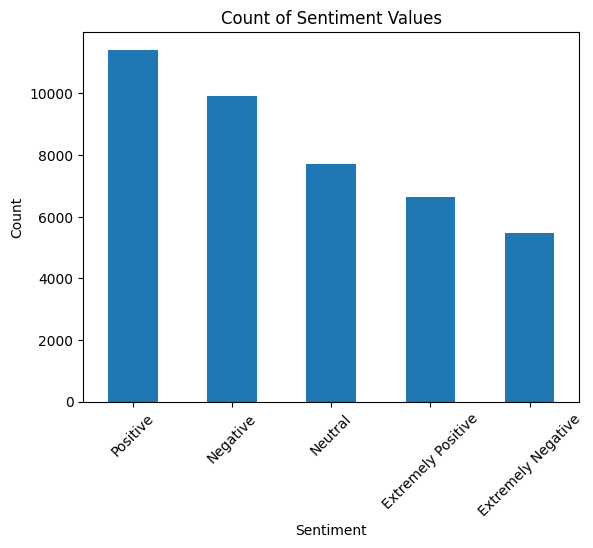

In [6]:
# TODO: plot a bar plot to check the count of Sentiment values
df_train['Sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of Sentiment Values')
plt.xticks(rotation=45)
plt.show()

**Expected Output:**

<img src="https://github.com/Sridipta-Roy/GenAI-Labs/blob/main/Week_6/MultiHead-Attention/assets/distribution.png?raw=1" width=400>

# Data Preparation

The data is prepared by carrying out the following steps:

* **Data cleaning:** Lowercasing, removing punctuations, URLs, HTML tags, excluding special characters etc.
* **Tokenizing and Padding:** Padding input and target tensors to a uniform length.
* **Sentiment Mapping and OneHot Encoding:** Map the sentiment labels to numerical values using a dictionary.

## Data Cleaning

Example tweet from the dataset:
```
My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j
```

We'll be performing some data cleaning steps to remove the following,
* **URLs**: This ensures that web addresses don't interfere with the sentiment analysis.

* **HTML Tags**: It removes any HTML tags that might be present in the tweets.

* **Digits**: Numerical digits usually don't carry much sentimental value.

* **Hashtags and Mentions**: Hashtags (e.g., #COVID19) and mentions (e.g., @WHO)

* **Stop Words**: common words like "the," "a," "is," etc.

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
# TODO

def text_cleaner(tweet):
    # TODO: remove urls
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # TODO: remove html tags
    tweet = re.sub(r'<.*?>', '', tweet)
    # TODO: remove digits
    tweet = re.sub(r'\d+', '', tweet)
    # TODO: remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    # TODO: remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    #TODO: remove stop words
    words = tweet.split()
    words = [word for word in words if word not in stop_words]
    tweet = ' '.join(words)

    return tweet

stop_words = set(nltk.corpus.stopwords.words('english')) #TODO: Load English stopwords

#TODO: Clean tweets using text_cleaner on x_train and x_test
x_train_clean = x_train.apply(text_cleaner)
x_test_clean = x_test.apply(text_cleaner)

x_train_clean.head()

,OriginalTweet
0,
1,advice Talk neighbours family exchange phone n...
2,Coronavirus Australia: Woolworths give elderly...
3,"My food stock one empty... PLEASE, panic, THER..."
4,"Me, ready go supermarket outbreak. Not I'm par..."


## Tokenizing and Padding

Example:

```
Sentence:
Due COVID- retail store classroom Atlanta open walk-in business classes next two weeks, beginning Monday, March . We continue process online phone orders normal! Thank understanding!

After tokenizing :
[34, 1, 69, 4, 11239, 4874, 153, 665, 39, 104, 2637, 174, 172, 146, 812, 766, 186, 25, 267, 1487, 13, 802, 450, 326, 102, 2185]

After padding :
[   34     1    69     4 11239  4874   153   665    39   104  2637   174
   172   146   812   766   186    25   267  1487    13   802   450   326
   102  2185     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0]

```

In [10]:
len(x_train[0])

111

In [11]:
# TODO

# TODO: Import Tokenizer and pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#TODO: Define tokenizer and fit on clean input text
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(x_train_clean)

#TODO: Convert the clean text to sequences
x_train_seqs = tokenizer.texts_to_sequences(x_train_clean)
x_test_seqs = tokenizer.texts_to_sequences(x_test_clean)

# TODO: Pad the train and test sequences
max_length = 55
x_train_seqs = pad_sequences(x_train_seqs, maxlen=max_length, padding='post', truncating='post')
x_test_seqs = pad_sequences(x_test_seqs, maxlen=max_length, padding='post', truncating='post')



In [12]:
x_test_seqs.shape

(3798, 55)

## Sentiment Mapping and One Hot Encoding

Build a sentiment map to create 3 classes:

* **Negative [0]** -> Extremely Negative, Negative
* **Neutral [1]**
* **Positive [2]** -> Extemely Positive, Positive


In [13]:
# TODO

# TODO: Map the sentiment labels to numerical values using a dictionary.
sentiments = {
    'Extremely Negative': 0,
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2,
    'Extremely Positive': 2
}

# TODO: Map the train and test target labels to above sentiments dictionary
y_train = y_train.map(sentiments)
y_test = y_test.map(sentiments)



In [14]:
# TODO: One hot encode target and test target

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

print(y_train.shape)
print(y_test.shape)

(41157, 3)
(3798, 3)


**REFLECTION**

\<Why do you think we have to one hot encode our target values?>

# Why One-Hot Encode Our Target Values?

## 1. Categorical Nature of Labels

Our sentiment labels (Negative=0, Neutral=1, Positive=2) are **categorical**. The numerical values don't represent a mathematical relationship, i.e,  "Positive (2)" isn't "twice as much" as "Neutral (1)". One-hot encoding prevents the model from interpreting these as ordered numerical values.

## 2. Compatibility with Softmax Activation

Our output layer uses **softmax** activation, which produces a probability distribution across all classes. It outputs three probabilities that sum to 1.0, like:
```python
[0.1, 0.2, 0.7]  # 10% Negative, 20% Neutral, 70% Positive
```

One-hot encoded labels match this format:
```python
[0, 0, 1]  # This represents "Positive"
```

This this representation helps the neural network understand the multi-class classification problem correctly!

In [15]:
validate_data_preparation(x_train_seqs, x_test_seqs, y_train, y_test)


# Model Training and Evaluation


In [46]:
# TODO

#TODO: Import the necessary layers from the TensorFlow
from tensorflow.keras.layers import Input, Embedding, MultiHeadAttention, Dense, LayerNormalization, GlobalAveragePooling1D, Dropout
from tensorflow.keras.models import Model

# Define the model
def multihead_attention_model(vocab_size, embedding_dim, num_heads, ff_dim):
    # TODO: Define an input layer
    inputs = Input(shape=(max_length,))
    # TODO: Define an Embedding layer
    embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)
    # TODO: Define a Multi-head attention layer
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim)(embedding, embedding)
    # TODO: Define a feed forward layer
    ffn = Dense(ff_dim, activation='relu')(attention_output)
    ffn = Dense(embedding_dim)(ffn)

    # TODO: Define a LayerNormalization layer
    normalized = LayerNormalization(epsilon=1e-6)(attention_output + embedding)
    # TODO: Define a Global Average Pooling layer to get a fixed-length representation
    pooled = GlobalAveragePooling1D()(normalized)

    # Additional dense layers
    dense = Dense(64, activation='relu')(pooled)
    dense = Dropout(0.3)(dense)

    # TODO: Define Output layer with 3 units corresponding to the number of classes
    outputs = Dense(3, activation='softmax')(dense)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [47]:
# TODO: Define model parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 256
num_heads = 4
ff_dim = 128

# TODO: Build the model
model = multihead_attention_model(vocab_size, embedding_dim, num_heads, ff_dim)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 55)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_6         │ (None, 55, 256)   │  9,197,824 │ input_layer_6[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 55, 256)   │  1,051,904 │ embedding_6[0][0… │
│ (MultiHeadAttentio… │                   │            │ embedding_6[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 55, 256)   │          0 │ multi_head_atten… │
│                     │                   │            │ embedding_6[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 55, 256)   │        512 │ add_6[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 64)        │     16,448 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 64)        │          0 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 3)         │        195 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,266,883 (39.17 MB)

 Trainable params: 10,266,883 (39.17 MB)

 Non-trainable params: 0 (0.00 B)

**REFLECTION**

# Thoughts on the Model Structure

## Overall Architecture

The model follows a **simplified Transformer-style architecture** that uses **multi-head attention** as its core mechanism for capturing relationships between words in the tweet.

## Layer-by-Layer Analysis

### 1. Input Layer
- Accepts sequences of fixed length (max_length = 55)
- Each tweet is represented as a sequence of token IDs

### 2. Embedding Layer
- Converts token IDs into dense vector representations (embedding_dim = 256)
- Allows the model to learn semantic relationships between words
- Output shape: `(batch_size, max_length, embedding_dim)`

### 3. Multi-Head Attention Layer
- Uses `num_heads = 4` attention heads to capture different aspects of word relationships. Each attention head operates on 256/4 = 64 dimensions (key_dim)
- Performs self-attention: each word attends to all other words in the sequence
- Learns which words are important for sentiment classification
- Can capture long-range dependencies without the sequential processing

### 4. Feed-Forward Network (FFN)
- Two dense layers that process the attention output
- First dense layer expands to `ff_dim = 128` with ReLU activation
- Second dense layer projects back to `embedding_dim`
- Adds non-linearity and transformation capacity to the model

### 5. Residual Connections & Layer Normalization
- **Residual connection**: `embedding + ffn` helps with gradient flow during training
- **Layer normalization**: Stabilizes training by normalizing across the feature dimension
- These components are borrowed from the original Transformer architecture

### 6. Global Average Pooling
- Reduces the sequence dimension `(batch_size, max_length, embedding_dim)` → `(batch_size, embedding_dim)`
- Aggregates information from all time steps into a single fixed-length vector
- Simple yet effective way to create a sentence-level representation

### 7. Additional Dense Layer with Dropout
- **Dense(64, activation='relu')**:
  - Reduces dimensionality from 256 to 64
  - Adds another level of non-linear transformation
- **Dropout(0.3)**:
  - Randomly drops 30% of neurons during training
  - **Regularization technique** that prevents overfitting
  - Forces the model to learn robust features rather than memorizing training data
  - Particularly important given the relatively small dataset size

### 8. Output Layer
- 3 neurons with softmax activation (one per sentiment class)
- Produces probability distribution over Negative, Neutral, and Positive classes

## Key Strengths

1. **Parallel Processing**: Unlike RNNs, multi-head attention processes all words simultaneously, making it computationally efficient
2. **Long-Range Dependencies**: Can capture relationships between distant words without the vanishing gradient problem of RNNs
3. **Interpretability**: Attention weights can potentially show which words the model focuses on for classification
4. **Simplicity**: Uses just one attention layer, making it lightweight compared to full Transformer models

## Potential Limitations

1. **No Positional Information**: The model lacks explicit positional embeddings, so it treats the sequence as a bag-of-words with attention
2. **Limited Context Modeling**: More sophisticated models (like BERT) use multiple stacked attention layers for deeper understanding

This relatively simple architecture is appropriate for this task, as sentiment is often expressed through specific keywords and phrases rather than requiring deep syntactic understanding.

In [48]:
# TODO

def main(model):

  # TODO: Compile the model with a categorical crossentropy loss
  model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

  # TODO: Train the model
  history = model.fit(
        x_train_seqs,
        y_train,
        validation_data=(x_test_seqs, y_test),
        epochs=10,
        batch_size=32,
        verbose=1
    )

  return model, history

if __name__ == "__main__":
    model, history = main(model)

Epoch 1/10
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5502 - loss: 0.9122 - val_accuracy: 0.8415 - val_loss: 0.4367
Epoch 2/10
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8964 - loss: 0.3234 - val_accuracy: 0.8457 - val_loss: 0.4568
Epoch 3/10
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9352 - loss: 0.2051 - val_accuracy: 0.8526 - val_loss: 0.5276
Epoch 4/10
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9465 - loss: 0.1539 - val_accuracy: 0.8502 - val_loss: 0.6022
Epoch 5/10
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9629 - loss: 0.1098 - val_accuracy: 0.8431 - val_loss: 0.6960
Epoch 6/10
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9713 - loss: 0.0846 - val_accuracy: 0.8346 - val_loss: 0.6588
Epoch 7/10
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9789 - loss: 0.0640 - val_accuracy: 0.8189 - val_loss: 0.8515
Epoch 8/10
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9837 - lo

**REFLECTION**

## Key Observations

#### 1. **Overfitting Pattern**

The model exhibits overfitting behavior:
- **Training accuracy**: Continuously improves from 55% → 98.8%
- **Validation accuracy**: Plateaus around 84-85% after epoch 2, then gradually declines
- **Training loss**: Drops dramatically from 0.91 → 0.036
- **Validation loss**: Initially decreases (0.44) but then increases significantly to 0.97

#### 2. **Rapid Initial Learning (Epochs 1-2)**

- **Massive jump** in training accuracy from 55% to 89.6% in just one epoch
- Validation accuracy reaches ~84% by epoch 2 and stabilizes
- This indicates the model quickly learns the primary sentiment patterns in the data

#### 3. **Divergence After Epoch 2**

Starting from epoch 3, we see a clear divergence:
- Training metrics continue improving
- Validation metrics plateau or worsen
- The gap between train and validation loss widens dramatically

### 4. **Performance Degradation (Epochs 5-10)**

- Validation accuracy drops from peak of 85.26% (epoch 3) to 82.89% (epoch 10)
- Validation loss increases from 0.44 to 0.97 (more than doubles!)
- Training accuracy keeps climbing to 98.8%, showing the model is memorizing training data

## Why Is The Model Behaving This Way?

#### 1. **Insufficient Regularization**

- Despite having dropout (0.3), the model still overfits severely

#### 2. **High Model Capacity vs. Dataset Size**

The model architecture is quite powerful:
- 256-dimensional embeddings, Multi-head attention mechanism, and Large vocabulary size
- With only about 41K training samples, this capacity allows memorization of training patterns

#### 3. **Learning Rate Too High or Not Adjusted**

The initial learning might be too high suggesting:
- The model learns coarse patterns quickly
- Then starts fitting to noise in the training data

**Best Model**: The checkpoint from Epoch 3 (val_accuracy: 0.8526, val_loss: 0.5276) should be used for final evaluation and inference, not the final epoch 10 model.

In order to pass this test, **achieve atleast 80% test accuracy**.

In [49]:
from sklearn.metrics import classification_report

# Evaluate the model
loss, test_accuracy = model.evaluate(x_test_seqs, y_test)
print('Test accuracy:', test_accuracy)

# Get predictions for the test set
y_pred = model.predict(x_test_seqs)

# Convert predictions to class labels (0, 1, 2)
y_pred_labels = numpy.argmax(y_pred, axis=1)

# Convert true labels (y_test) to class labels
y_true_labels = numpy.argmax(y_test, axis=1)

# Calculate classification report
# You can also use other metrics like precision, recall, F1-score
print(classification_report(y_true_labels, y_pred_labels))

test_model_accuracy(test_accuracy)

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8291 - loss: 0.9540
Test accuracy: 0.8288573026657104
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1633
           1       0.84      0.78      0.81       619
           2       0.82      0.86      0.84      1546

    accuracy                           0.83      3798
   macro avg       0.83      0.82      0.82      3798
weighted avg       0.83      0.83      0.83      3798



**REFLECTION**

## Model Evaluation Observations

## Overall Performance

- **Test Accuracy**: 82.89%
- **Overall F1-Score**: 0.83


## Class-wise Performance Analysis

| Class | Precision | Recall | F1-Score | Support | Interpretation |
|-------|-----------|--------|----------|---------|----------------|
| **0 (Negative)** | 0.84 | 0.82 | 0.83 | 1633 | Strong performance |
| **1 (Neutral)** | 0.84 | 0.78 | 0.81 | 619 | Lowest recall |
| **2 (Positive)** | 0.82 | 0.86 | 0.84 | 1546 | Best recall |

## Key Observations

#### 1. **Balanced Performance Across Classes**
- All classes achieve precision and recall between 0.78-0.86
- F1-scores are consistently around 0.81-0.84
- No single class dominates or underperforms significantly

#### 2. **Class Imbalance Impact**
- **Negative (1633 samples)**: Largest class, good performance (F1: 0.83)
- **Neutral (619 samples)**: Smallest class, lowest recall (0.78) - model struggles most with neutral sentiment
- **Positive (1546 samples)**: Second largest, highest recall (0.86)

#### 3. **Neutral Class Challenge**
- Neutral sentiment has the **lowest recall (0.78)**, meaning the model misses 22% of neutral tweets
- The model may be confusing neutral tweets with slightly negative or positive ones

#### 4. **Satifactory Generalization**
- Despite severe overfitting observed during training (train acc: 98.8%), the model still achieves **82.89% test accuracy**
- Performance gap between validation (82.89% at epoch 10) and test (82.89%) is minimal, showing consistent evaluation

## Conclusion

The model demonstrates **pretty solid performance** for a single-layer attention mechanism, achieving 82.89% accuracy on unseen test data. The consistent performance across all three sentiment classes (F1-scores: 0.81-0.84) indicates the model has learned meaningful sentiment patterns rather than exploiting class imbalance. The main weakness is identifying neutral sentiment, which is expected given its subjective and ambiguous nature in social media text.



In [39]:
from helpers import *

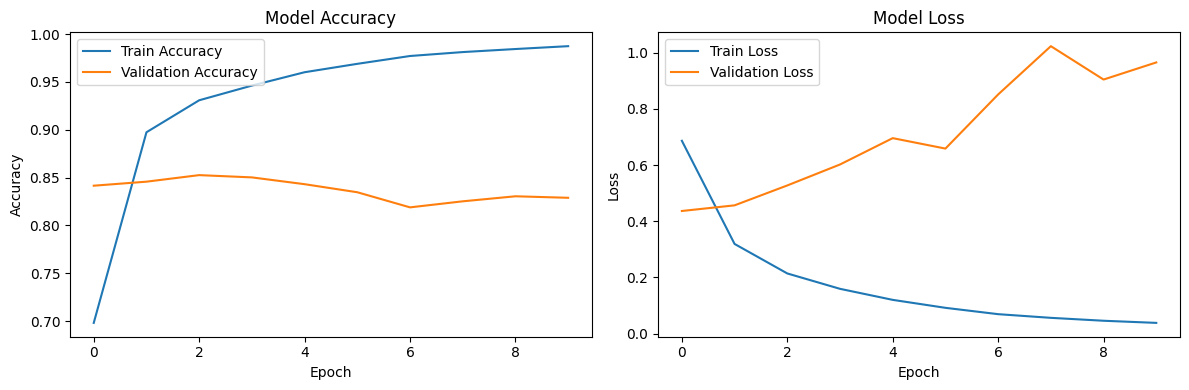

In [50]:
plot_metrics(history)

**REFLECTION**


## Model Accuracy Plot

- **Training accuracy** (blue): Steep climb from 70% to ~90% by epoch 2, then gradual increase to ~99%
- **Validation accuracy** (orange): Quick jump to ~84% by epoch 2, then **plateaus and slightly declines**
- **Clear divergence** starting from epoch 2-3, indicating overfitting

## Model Loss Plot

- **Training loss** (blue): Continuously decreases from ~0.7 to nearly 0, showing the model is learning training data perfectly
- **Validation loss** (orange): Initially drops to ~0.44, then **steadily increases** to ~1.0, classic overfitting signal
- The validation loss curve decreases until epoch 2-3, then rises sharply

## Key Takeaways

1. **Optimal stopping point**: Epoch 2-3 where validation metrics are best (accuracy ~85%, loss ~0.44-0.53)
2. **Severe Overfitting**: The widening gap between train and validation curves after epoch 3 confirms severe overfitting
3. **Early stopping needed**: Training beyond epoch 3 only degrades validation performance


# Improvement Strategies

Here are some model improvement strategies you can consider to improve the model:

1. **Embedding Dimension (embedding_dim)**: Try values like 64, 128, 256, or 512.
2. **Number of Heads (num_heads)**: Experiment with values like 4, 8, or 16.
3. **Feedforward Dimension (ff_dim)**: Try values like 128, 256, or 512.
4. **Add More Layers**: Consider adding more multi-head attention layers and feedforward layers to increase the model's capacity to learn complex patterns.
5. **Learned Positional Embeddings**: Add a trainable embedding layer to represent the position of each word.

# Inference

In [51]:
from sklearn.metrics import accuracy_score, classification_report

labels = ['Negative', 'Neutral', 'Positive']
sentence = "There is no vaccine to cure Corona Virus!"

predicted_sentiment = run_inference(model, text_cleaner, tokenizer, sentence, labels)

print(f"Input Sentence: {sentence}")
print(f"Predicted Sentiment: {predicted_sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
Input Sentence: There is no vaccine to cure Corona Virus!
Predicted Sentiment: Neutral
